In [57]:
import polars as pl
import polars.selectors as cs

## Batting Data ##

In [58]:
(batting :=
 pl.read_csv('./data/lahman_1871-2024_csv/Batting.csv')
     .filter((pl.col('yearID') >= 2013) & (pl.col('stint') == 1))
    .select(cs.by_name('playerID', 'yearID') | cs.integer())
)




playerID,yearID,stint,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2013,1,43,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2015,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null
"""abadfe01""",2013,1,39,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2014,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2015,1,62,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuninmi01""",2022,1,36,null,115,7,17,3,0,5,16,0,0,6,46,0,1,0,1,2,null
"""zuninmi01""",2023,1,42,42,124,11,22,7,0,3,11,0,0,15,61,0,1,0,0,3,null
"""zychto01""",2015,1,13,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null


## Fielding Stats ##

In [59]:
fielding = (
    pl.read_csv("./data/lahman_1871-2024_csv/Fielding.csv")
    .filter(pl.col("yearID") >= 2013)
    .filter(pl.col("POS").is_in(["OF", "LF", "CF", "RF"]))  
    .group_by(["playerID", "yearID"])
    .agg([
        pl.col("PO").sum().alias("PO"),
        pl.col("A").sum().alias("A"),
        pl.col("E").sum().alias("E"),
        pl.col("G").sum().alias("G"),
    ])
)
fielding

playerID,yearID,PO,A,E,G
str,i64,i64,i64,i64,i64
"""ortegra01""",2022,133,4,1,93
"""kivlepa01""",2016,14,0,2,7
"""pearcst01""",2017,132,2,2,85
"""tapiara01""",2022,217,4,3,124
"""gentrcr01""",2017,68,2,3,68
…,…,…,…,…,…
"""reynobr01""",2019,237,4,4,129
"""urenari01""",2019,1,0,0,1
"""heredgu01""",2019,137,1,3,79


## Allstar Data ##

In [60]:
allstar_full = (
    pl.read_csv('./data/lahman_1871-2024_csv/AllstarFull.csv',
                columns=['playerID', 'yearID'])  
    .filter(pl.col('yearID') >= 2013)
    .unique()
    .with_columns(pl.lit('yes').alias('Allstar'))
)

allstar_full

playerID,yearID,Allstar
str,i64,str
"""seageco01""",2022,"""yes"""
"""freemfr01""",2019,"""yes"""
"""strasst01""",2017,"""yes"""
"""buehrma01""",2014,"""yes"""
"""acunaro01""",2021,"""yes"""
…,…,…
"""montemi01""",2014,"""yes"""
"""winkeje01""",2021,"""yes"""
"""troutmi01""",2021,"""yes"""


## Combining Data - AllStar ##

In [61]:


(allstar_joined :=
 fielding
        .join(batting, on = ['playerID', 'yearID'], how='left', suffix = '_bat')
        .join(allstar_full, on=['playerID', 'yearID'], how='left', suffix='_allstar')
        .with_columns(pl.col("Allstar").fill_null('no'))
        .select(cs.by_name('Allstar') | cs.by_name('playerID', 'yearID') | cs.integer())
)



playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""ortegra01""",2022,133,4,1,93,1,118,null,316,35,76,14,1,7,35,12,7,44,74,2,2,1,7,10,null,"""no"""
"""kivlepa01""",2016,14,0,2,7,1,5,null,16,5,4,0,0,1,2,0,0,2,9,0,1,0,0,0,null,"""no"""
"""pearcst01""",2017,132,2,2,85,1,92,null,313,38,79,17,1,13,37,0,0,27,68,1,5,0,3,11,null,"""no"""
"""tapiara01""",2022,217,4,3,124,1,128,null,411,47,109,20,3,7,52,8,2,16,81,0,0,3,1,12,null,"""no"""
"""gentrcr01""",2017,68,2,3,68,1,77,null,101,17,26,5,1,2,11,5,4,11,24,0,1,3,1,1,null,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""reynobr01""",2019,237,4,4,129,1,134,null,491,83,154,37,4,16,68,3,2,46,121,0,6,0,3,9,null,"""no"""
"""urenari01""",2019,1,0,0,1,1,30,null,74,4,18,6,0,0,4,0,0,2,23,0,1,3,0,0,null,"""no"""
"""heredgu01""",2019,137,1,3,79,1,89,null,204,31,46,13,0,5,20,2,2,18,60,0,6,2,1,4,null,"""no"""


In [62]:
training_allstar = allstar_joined.with_columns(TrainingValidation = pl.when(pl.col('yearID') < 2024).then(pl.lit('Training')).otherwise(pl.lit('Validation')))
training_allstar

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""ortegra01""",2022,133,4,1,93,1,118,null,316,35,76,14,1,7,35,12,7,44,74,2,2,1,7,10,null,"""no""","""Training"""
"""kivlepa01""",2016,14,0,2,7,1,5,null,16,5,4,0,0,1,2,0,0,2,9,0,1,0,0,0,null,"""no""","""Training"""
"""pearcst01""",2017,132,2,2,85,1,92,null,313,38,79,17,1,13,37,0,0,27,68,1,5,0,3,11,null,"""no""","""Training"""
"""tapiara01""",2022,217,4,3,124,1,128,null,411,47,109,20,3,7,52,8,2,16,81,0,0,3,1,12,null,"""no""","""Training"""
"""gentrcr01""",2017,68,2,3,68,1,77,null,101,17,26,5,1,2,11,5,4,11,24,0,1,3,1,1,null,"""no""","""Training"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""reynobr01""",2019,237,4,4,129,1,134,null,491,83,154,37,4,16,68,3,2,46,121,0,6,0,3,9,null,"""no""","""Training"""
"""urenari01""",2019,1,0,0,1,1,30,null,74,4,18,6,0,0,4,0,0,2,23,0,1,3,0,0,null,"""no""","""Training"""
"""heredgu01""",2019,137,1,3,79,1,89,null,204,31,46,13,0,5,20,2,2,18,60,0,6,2,1,4,null,"""no""","""Training"""


In [63]:
training_allstar.filter((pl.col('yearID') == 2024))

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""flories01""",2024,35,1,1,26,1,36,36,98,11,17,6,2,3,11,2,1,11,41,0,1,1,0,2,0,"""no""","""Validation"""
"""fermijo01""",2024,0,0,0,1,1,45,45,71,7,11,1,1,0,4,2,1,7,11,0,1,0,0,3,0,"""no""","""Validation"""
"""freemty01""",2024,193,8,1,97,1,118,118,330,48,69,14,1,7,32,11,6,28,53,1,19,3,3,15,0,"""no""","""Validation"""
"""greenri02""",2024,203,4,3,115,1,137,137,512,82,134,27,6,24,74,4,2,64,156,3,5,0,2,2,0,"""yes""","""Validation"""
"""smithpa04""",2024,41,2,0,33,1,60,60,137,26,37,11,0,9,36,1,0,18,31,0,0,0,3,4,0,"""no""","""Validation"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""carroco02""",2024,358,6,2,159,1,158,158,589,121,136,22,14,22,74,35,8,73,130,0,10,3,9,3,0,"""no""","""Validation"""
"""dahlda01""",2024,18,1,0,15,1,19,19,58,6,12,2,0,3,8,0,0,3,21,0,0,0,1,0,0,"""no""","""Validation"""
"""loftini01""",2024,0,0,0,4,1,57,56,148,15,28,4,0,1,14,1,0,19,24,0,1,1,2,4,0,"""no""","""Validation"""


In [64]:
training_allstar.head()

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""ortegra01""",2022,133,4,1,93,1,118,null,316,35,76,14,1,7,35,12,7,44,74,2,2,1,7,10,null,"""no""","""Training"""
"""kivlepa01""",2016,14,0,2,7,1,5,null,16,5,4,0,0,1,2,0,0,2,9,0,1,0,0,0,null,"""no""","""Training"""
"""pearcst01""",2017,132,2,2,85,1,92,null,313,38,79,17,1,13,37,0,0,27,68,1,5,0,3,11,null,"""no""","""Training"""
"""tapiara01""",2022,217,4,3,124,1,128,null,411,47,109,20,3,7,52,8,2,16,81,0,0,3,1,12,null,"""no""","""Training"""
"""gentrcr01""",2017,68,2,3,68,1,77,null,101,17,26,5,1,2,11,5,4,11,24,0,1,3,1,1,null,"""no""","""Training"""


## Lab 5.2 ##

In [65]:
#limit to position = outfield
#validation just 2024?

#for y - get the column, instead of select
#don't keep the allstar column in the matrix

In [66]:
import polars as pl

df = training_allstar

df = df.with_columns(pl.col("Allstar").str.to_lowercase())

counts = (
    df.group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)
print(counts)

counts_2024 = (
    df.filter(pl.col("yearID") == 2024)
      .group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)
print(counts_2024)


shape: (2, 3)
┌─────────┬───────┬──────────┐
│ Allstar ┆ count ┆ percent  │
│ ---     ┆ ---   ┆ ---      │
│ str     ┆ u32   ┆ f64      │
╞═════════╪═══════╪══════════╡
│ no      ┆ 3666  ┆ 0.947532 │
│ yes     ┆ 203   ┆ 0.052468 │
└─────────┴───────┴──────────┘
shape: (2, 3)
┌─────────┬───────┬──────────┐
│ Allstar ┆ count ┆ percent  │
│ ---     ┆ ---   ┆ ---      │
│ str     ┆ u32   ┆ f64      │
╞═════════╪═══════╪══════════╡
│ yes     ┆ 18    ┆ 0.056075 │
│ no      ┆ 303   ┆ 0.943925 │
└─────────┴───────┴──────────┘


In [67]:
df = df.with_columns(pl.col("yearID").cast(pl.Int64))

VAL_YEAR = 2024

training_df = df.filter(pl.col("yearID") < VAL_YEAR)

validation_df = df.filter(pl.col("yearID") == VAL_YEAR)

print("Training years:", training_df.select(pl.col("yearID").unique()))
print("Validation years:", validation_df.select(pl.col("yearID").unique()))

print("Training shape:", training_df.shape)
print("Validation shape:", validation_df.shape)


Training years: shape: (11, 1)
┌────────┐
│ yearID │
│ ---    │
│ i64    │
╞════════╡
│ 2013   │
│ 2014   │
│ 2015   │
│ 2016   │
│ 2017   │
│ …      │
│ 2019   │
│ 2020   │
│ 2021   │
│ 2022   │
│ 2023   │
└────────┘
Validation years: shape: (1, 1)
┌────────┐
│ yearID │
│ ---    │
│ i64    │
╞════════╡
│ 2024   │
└────────┘
Training shape: (3548, 28)
Validation shape: (321, 28)


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train = training_df.drop(["Allstar", "playerID", "TrainingValidation"], strict=False).to_pandas()
y_train = training_df.select("Allstar").to_pandas().iloc[:, 0].map({"yes": 1, "no": 0})

cart_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

param_grid_cart = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

grid_cart = GridSearchCV(cart_model, param_grid_cart, cv=5, scoring="roc_auc")
grid_cart.fit(X_train, y_train)

print("Best CART Parameters:", grid_cart.best_params_)
print("Best CART ROC-AUC:", grid_cart.best_score_)

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid_rf = {
    "n_estimators": [200, 400],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="roc_auc", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest ROC-AUC:", grid_rf.best_score_)


Best CART Parameters: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best CART ROC-AUC: 0.9329805613563042
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
Best Random Forest ROC-AUC: 0.95753339175516


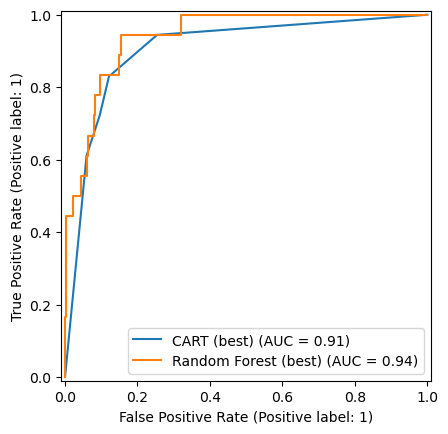

In [69]:
train_p = training_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))
valid_p = validation_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))

drop_cols = {"Allstar","y","playerID","TrainingValidation","yearID"}
feat = [c for c in train_p.columns if c not in drop_cols]

Xtr = train_p.select(feat).to_numpy(); ytr = train_p.select("y").to_numpy().ravel()
Xva = valid_p.select(feat).to_numpy(); yva = valid_p.select("y").to_numpy().ravel()

cart = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2,
                              class_weight="balanced", random_state=42).fit(Xtr,ytr)
rf   = RandomForestClassifier(n_estimators=400, max_depth=5, min_samples_leaf=3, min_samples_split=2,
                              class_weight="balanced", random_state=42, n_jobs=-1).fit(Xtr,ytr)
ax = plt.gca()
RocCurveDisplay.from_estimator(cart, Xva, yva, ax=ax, name="CART (best)")
RocCurveDisplay.from_estimator(rf,   Xva, yva, ax=ax, name="Random Forest (best)")
plt.show()


## Lab 5.3 ##